# 04. Классификация

Содержание:
- Метод $k$ ближайших соседей (kNN)
- Нейронные сети
- Ссылки для дальнейшего изучения

# Метод $k$ ближайших соседей (kNN)

kNN (k-nearest neighbors) $-$ один из самых простых алгоритмов классификации.
Он относится к категории _ленивых алгоритмов_, поскольку в процессе обучения он просто запоминает все данные, а вычисления происходят только в момент классификации нового объекта.

Принцип работы:

1. Вычисляем расстояние от нового объекта до всех точек в обучающей выборке
2. Выбираем $k$ ближайших соседей
3. Назначаем новому объекту класс, который наиболее распространен среди этих $k$ соседей


![](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-22-at-2.34.57-PM.png)

## Метрики расстояния

_Расстояние_ $-$ это численная мера того, насколько далеко друг от друга находятся два объекта в пространстве признаков.

Популярные метрики расстояния:

| Метрика | Формула | Особенности |
|---------|---------|-------------|
| евклидово (L2) | $d = \sqrt{\sum_i(x_i - y_i)^2}$ | Наиболее интуитивная, "прямое" расстояние |
| манхэттенское (L1) | $d = \sum_i |x_i - y_i|$ | Подходит для данных с большим количеством выбросов |
| косинусное | $d = 1 - \frac{xy}{|x| |y|}$ | Эффективно для текстовых данных, $xy$ $-$ скалярное произведение |
| Минковского | $d = (\sum_i |x_i - y_i|^p)^{\frac{1}{p}}$ | При $p=1$ получаем L1, при $p=2$ получаем L2 |

## Реализация

`from sklearn.neighbors import KNeighborsClassifier`

## Пример

[Датасет Ирисы Фишера](https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html) состоит из данных о 150 экземплярах ириса,
по 50 экземпляров из трёх видов:
- Ирис щетинистый (Iris setosa),
- Ирис виргинский (Iris virginica) и
- Ирис разноцветный (Iris versicolor).

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):
- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса $-$ три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

![](https://scikit-learn.org/1.4/_images/sphx_glr_plot_iris_dataset_001.png)

In [1]:
# Импорт библиотек
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2]  # ВАЖНО! Далее используем только два признака (для визуализации)
y = iris.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
# Создание и обучение модели
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Оценка точности
accuracy = knn.score(X_test, y_test)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.80


### Визуализация результатов

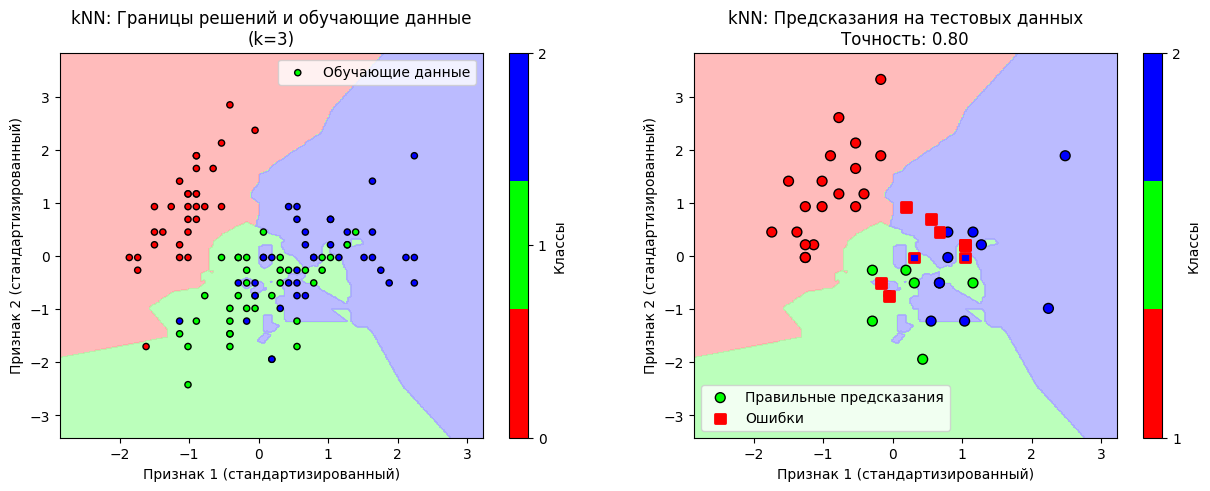

In [3]:
from matplotlib.colors import ListedColormap

# Создаем цветовую карту для классов
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Создаем сетку для построения границ решений
h = 0.02  # шаг сетки
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Предсказываем класс для каждой точки сетки
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Создаем график
plt.figure(figsize=(15, 5))


# 1. Визуализация обучающих данных и границ решений

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, 
            edgecolor='black', s=20, label='Обучающие данные')
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title('kNN: Границы решений и обучающие данные\n(k=3)')
plt.colorbar(ticks=[0, 1, 2], label='Классы')
plt.legend()


# 2. Визуализация тестовых данных и предсказаний

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Предсказания для тестовых данных
y_pred = knn.predict(X_test)

# Отмечаем правильные и неправильные предсказания
correct = y_pred == y_test
incorrect = ~correct

# Правильные предсказания
plt.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], 
            cmap=cmap_bold, edgecolor='black', s=50, marker='o', 
            label='Правильные предсказания')

# Неправильные предсказания
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], c=y_test[incorrect], 
            cmap=cmap_bold, edgecolor='red', s=50, marker='s', 
            linewidth=2, label='Ошибки')

plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title(f'kNN: Предсказания на тестовых данных\nТочность: {accuracy:.2f}')
plt.colorbar(ticks=[0, 1, 2], label='Классы')
plt.legend()

### Матрица ошибок (confusion matrix)

<Figure size 600x500 with 0 Axes>

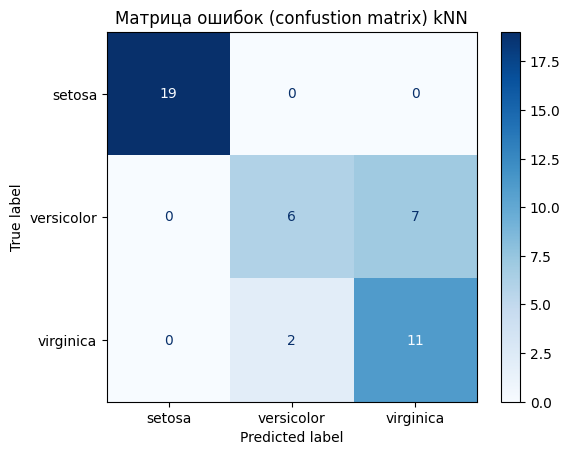

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок (confustion matrix) kNN')
plt.show()

# Нейронные сети

Нейронная сеть $-$ это математическая модель, вдохновленная работой человеческого мозга.
Она состоит из взаимосвязанных _нейронов_, организованных в _слои_.

![](https://clevertap.com/wp-content/uploads/2019/04/Neural_Network_Brain_Mimic.jpeg)

Основные компоненты:
- _Входной слой (input)_ $-$ получает данные
- _Скрытые слои (hidden)_ $-$ выполняют вычисления
- _Выходной слой (output)_ $-$ выдает результат
- _Веса (weights)_ $-$ параметры, которые обучаются
- _Функции активации (activation functions)_ $-$ добавляют нелинейность

[Источник: [hvidberrrg.github.io](https://hvidberrrg.github.io/deep_learning/activation_functions_in_artificial_neural_networks.html)]

Биологический нейрон:

![](https://hvidberrrg.github.io/deep_learning/assets/sem_image_of_biological_neuron.png)

Математический нейрон:

![](https://hvidberrrg.github.io/deep_learning/assets/activation_function_diagram.png)

## Реализация

Библиотека [PyTorch](https://pytorch.org/) является стандартным инструментом для работы с нейронными сетями. Данные представляются _тензорами_ (многомерными массивами данных).

![](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png?20211003060202)

## Пример (тот же датасет)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Конвертация в тензоры PyTorch

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

При конструировании нейронной сети нам потребуется:
- линейный слой (Linear)
- нелинейная функция активации (ReLU)
- и функция softmax

_Линейный слой_ преобразует входные данные через умножение на матрицу весов и добавление смещения. Если на входе 100 чисел, а на выходе нужно 10 $-$ линейный слой создаст 10 новых значений, каждое как взвешенную сумму всех входных.

```python
# Из 100 признаков получаем 10
layer = nn.Linear(100, 10)
```

_ReLU_ $-$ функция активации, которая оставляет положительные числа без изменений, а отрицательные заменяет нулями. Нужна, чтобы нейросеть могла решать сложные нелинейные задачи.

```
f(x) = max(0, x)
```

_Softmax_ преобразует любые числа в вероятности. Самые большие числа становятся самыми вероятными, сумма всех выходов всегда равна 1. Используется в последнем слое для классификации.

In [6]:
# Определение нейронной сети

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 10)
        self.output = nn.Linear(10, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.softmax(self.output(x))
        return x

model = SimpleNN()

### Визуализируем построенную модель разными способами

Слои и веса

In [7]:
from torchsummary import summary

# Показывает детальную информацию о модели
summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              30
              ReLU-2                   [-1, 10]               0
            Linear-3                    [-1, 3]              33
           Softmax-4                    [-1, 3]               0
Total params: 63
Trainable params: 63
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Граф вычислений (без подробностей)

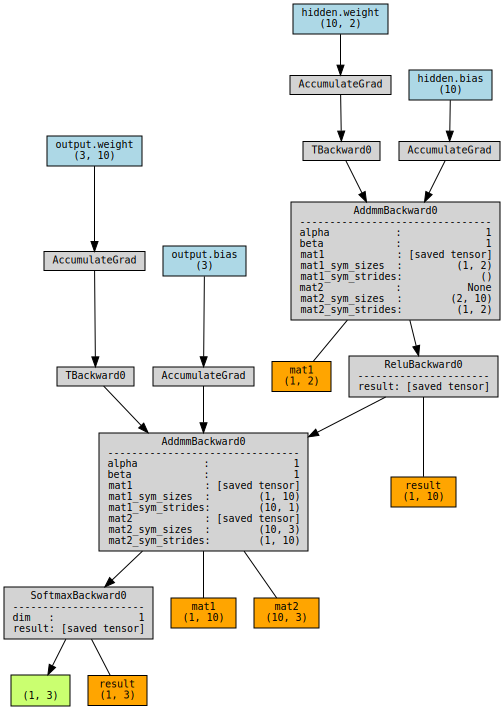

In [8]:
from torchviz import make_dot

x_example = torch.randn(1, 2)  # пример входных данных

# Визуализация графа вычислений
y_pred = model(x_example)
dot = make_dot(y_pred, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)
#dot.render('model_architecture', format='png', cleanup=True)
dot

### Обучение нейронной сети

Здесь используются:

- `CrossEntropyLoss()`: функция, которая измеряет, насколько предсказания нейросети отличаются от правильных ответов. Чем больше уверенность в неверном ответе, тем больше штраф. Именно эту величину мы минимизируем при обучении.
- `optim.Adam()`: алгоритм обновления весов нейросети. Смотрит на градиенты (направления, куда нужно изменить веса) и обновляет их с учётом предыдущих изменений.
- `epochs`: количество полных проходов через все обучающие данные. Одна эпоха $-$ когда нейросеть увидела каждый пример из тренировочного набора ровно один раз.
- `losses`: значения функции потерь во время обучения. Мы смотрим на динамику losses, чтобы понять: учится ли модель (loss уменьшается), не переобучилась ли (train loss падает, а val loss растёт).

In [9]:
# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Обучение модели
epochs = 1000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.094522476196289
Epoch 100, Loss: 0.7495166063308716
Epoch 200, Loss: 0.7330932021141052
Epoch 300, Loss: 0.7259353399276733
Epoch 400, Loss: 0.7204818725585938
Epoch 500, Loss: 0.7165920734405518
Epoch 600, Loss: 0.7148474454879761
Epoch 700, Loss: 0.7140216827392578
Epoch 800, Loss: 0.7135573029518127
Epoch 900, Loss: 0.7132635712623596


График функции потерь

Text(0, 0.5, 'Loss')

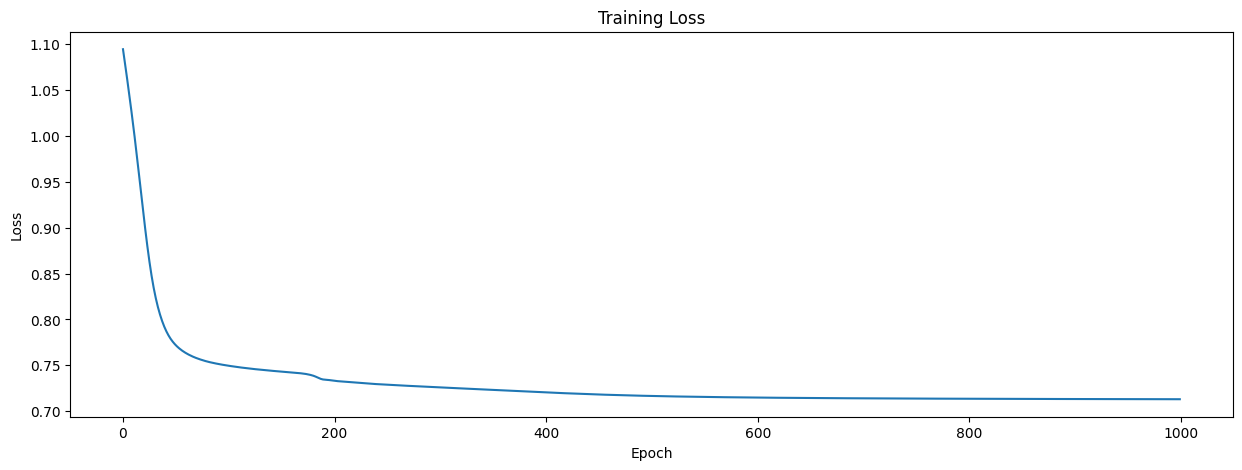

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Проверим работу модели на тестовых данных

Сейчас модель находится в режиме обучения. Чтобы проверить модель на тестовых данных выключим режим обучения.
- `model.eval()`: отключает слои, которые работают только во время обучения (например, `dropout` $-$ который случайно "выключает" часть нейронов для улучшения обобщения)
- `with torch.no_grad()`: контекст, в котором PyTorch не отслеживает операции для вычисления градиентов. Экономит память и ускоряет работу, когда нам нужно только получить предсказания, а не обучать модель

In [11]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'\nTest Accuracy: {accuracy:.4f}')


Test Accuracy: 0.8222


<Figure size 600x500 with 0 Axes>

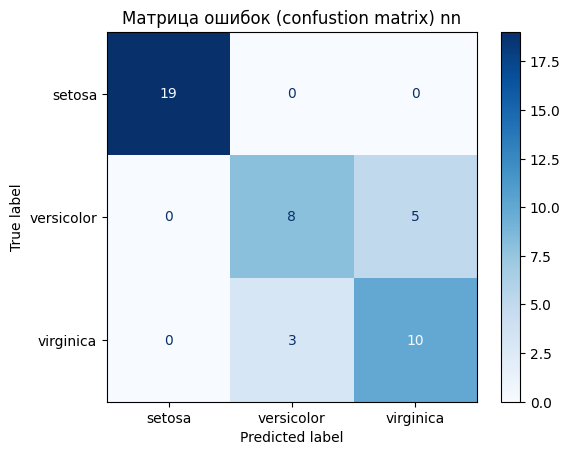

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок (confustion matrix) nn')
plt.show()

In [13]:
from sklearn.metrics import classification_report

print('\nClassification Report:')
print(classification_report(y_test, predicted))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



### Границы принятия решений

<function matplotlib.pyplot.show(close=None, block=None)>

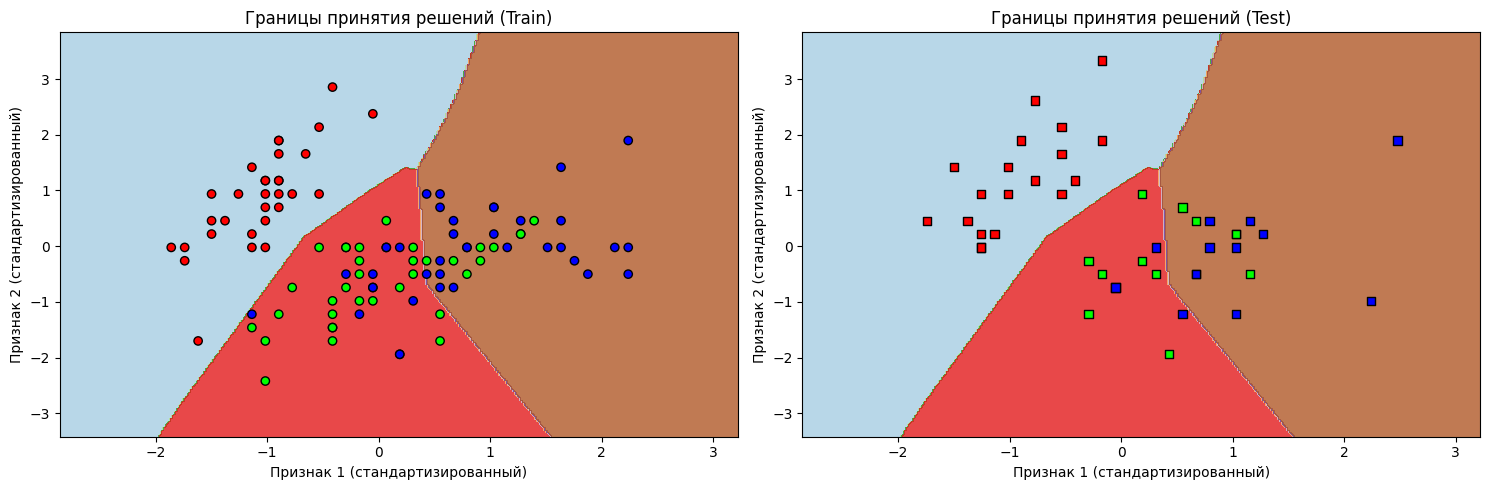

In [14]:
plt.figure(figsize=(15, 5))

# График границ принятия решений
plt.subplot(1, 2, 1)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

mesh_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
with torch.no_grad():
    mesh_outputs = model(mesh_tensor)
    mesh_predicted = torch.max(mesh_outputs, 1)[1]
    Z = mesh_predicted.numpy().reshape(xx.shape)

# Данные обучающей выборки
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap_bold)
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title('Границы принятия решений (Train)')

# Тестовые данные
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cmap_bold, marker='s')
plt.xlabel('Признак 1 (стандартизированный)')
plt.ylabel('Признак 2 (стандартизированный)')
plt.title('Границы принятия решений (Test)')

plt.tight_layout()
plt.show

# Заключение

kNN и нейронные сети представляют два разных подхода к задаче классификации.

kNN прост в понимании и реализации, но может быть медленным на больших данных.

Нейронные сети требуют больше вычислительных ресурсов и времени на обучение, но могут решать сложные задачи и хорошо масштабируются.


| Критерий | kNN | Нейронные сети |
|----------|-----|----------------|
| **Сложность** | Простой | Сложная |
| **Требования к данным** | Нет особых требований | Требуется много данных |
| **Интерпретируемость** | Высокая | Низкая |
| **Время обучения** | Не требует обучения | Длительное обучение |
| **Время предсказания** | Медленное | Быстрое |

# Ссылки для дальнейшего изучения

- [scikit-learn](https://scikit-learn.org/) - документация по kNN
- [PyTorch](https://pytorch.org/) - официальный туториал